In [13]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
print(train_images.shape)
print(train_labels)
#(60000, 28, 28)
print(test_images.shape)
#90030 5]
print(len(test_labels))

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


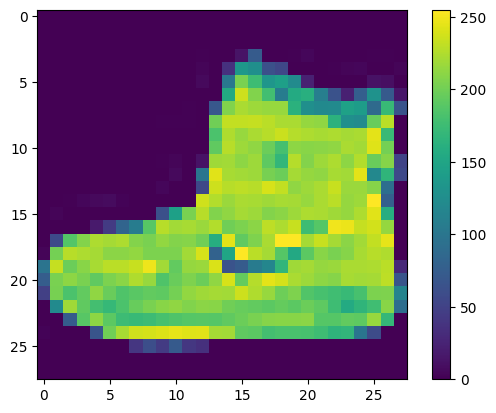

In [15]:
# 훈련 세트에 있는 첫 번째 이미지 - 픽셀 값의 범위가 0~255 사이 확인
plt.figure()
plt.imshow(train_images[0]) #default colormap : viridis(최솟값이 보라, 최댓값이 노랑)
plt.colorbar() #컬러 바는 플롯의 색상 비율에 대한 숫자를 표시 어떤 숫자가 어떤 색상으로 표현되는지 보여주는 키와 같음
plt.grid(False)
plt.show()
#0~1사이로
train_images = train_images / 255.0
test_images = test_images / 255.0

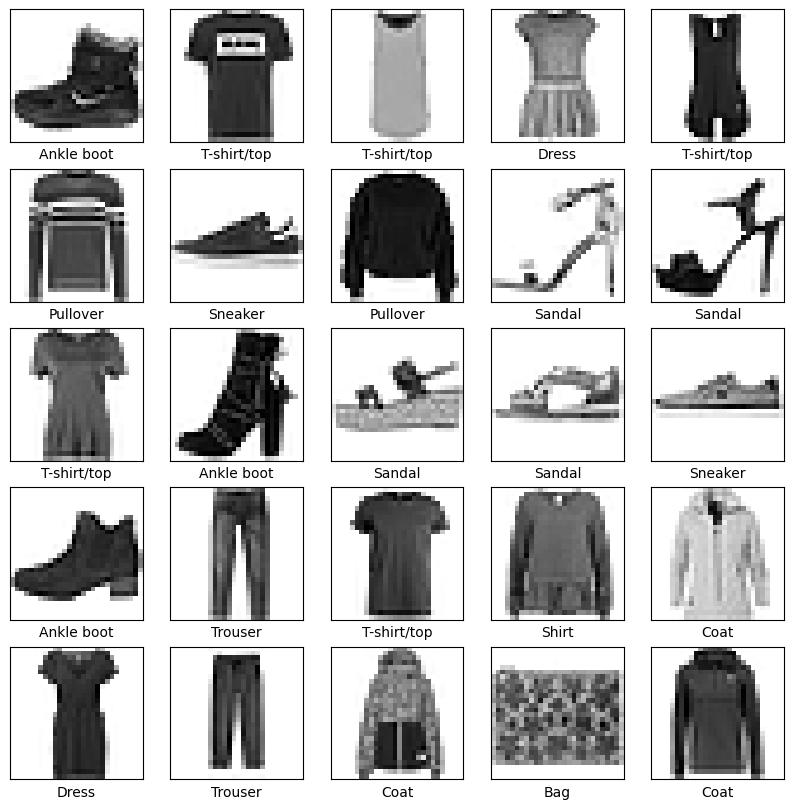

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt. imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [20]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
import numpy as np
# 데이터셋이 제공된다고 가정
# train_images, train_labels, test_images, test_labels = ...
# 모델 정의
model = Sequential()
# 2차원 배열(28 x 28픽셀)의 이미지 포맷을 28* 28= 784 픽셀의 1차원 배열로 변환 
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu')) 
model.add (Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# 콜백 정의
# Earlystopping 콜백: 성능이 향상되지 않을 경우 학습을 조기 종료
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# Mode1Checkpoint 콜백: 최상의 모델을 저장
model_checkpoint = ModelCheckpoint(filepath='best_model_fcnn.keras', monitor='val_loss' ,
save_best_only=True)

In [22]:
# 모델 학습
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2,
            callbacks=[early_stopping, model_checkpoint])
# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)
# 훈련된 모델을 사용하여 이미지에 대한 예측을 생성
predictions = model. predict (test_images)
# 예측 결과 출력
print(predictions[0])
print(np.argmax(predictions[0])) # 예측된 레이블 출력
print(test_labels[0])# 실제 레이블 출력

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.7752 - loss: 0.6525 - val_accuracy: 0.8535 - val_loss: 0.4199
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.8592 - loss: 0.3952 - val_accuracy: 0.8533 - val_loss: 0.4098
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.8741 - loss: 0.3451 - val_accuracy: 0.8730 - val_loss: 0.3591
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.8808 - loss: 0.3234 - val_accuracy: 0.8656 - val_loss: 0.3692
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.8902 - loss: 0.2995 - val_accuracy: 0.8763 - val_loss: 0.3399
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - accuracy: 0.8949 - loss: 0.2829 - val_accuracy: 0.8803 - val_loss: 0.3274
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.8989 - loss: 0.2731 - val_accuracy: 0.8889 - val_loss: 0.3092
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.9059 -

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({}))". format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names [true_label]), color=color)
# predictions_array 10개의 실수 결과 값/true_label 분류번호
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    #y축을 0~1 사이로
    predicted_label = np.argmax(predictions_array)
    #올바른 예측은 파랑색 / 잘못된 예측은 빨강색
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

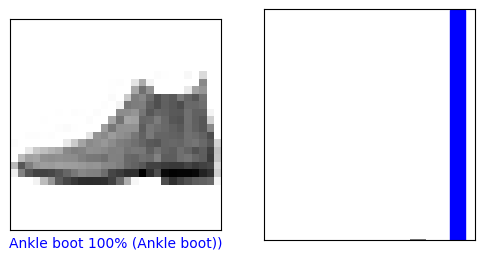

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# predictions, test_labels,test_images의 0번재 index값을
# 넘겨줌 (해당 이미지를 표시)
plot_image(i, predictions, test_labels, test_images) 
plt.subplot(1,2,2)
#값을 bar로 표시
plot_value_array(i, predictions, test_labels) 
plt.show()


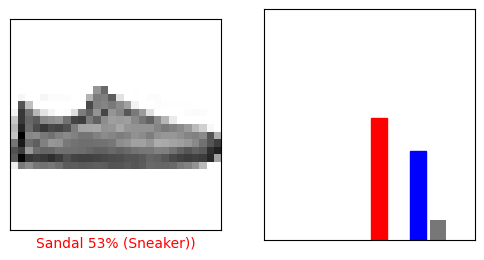

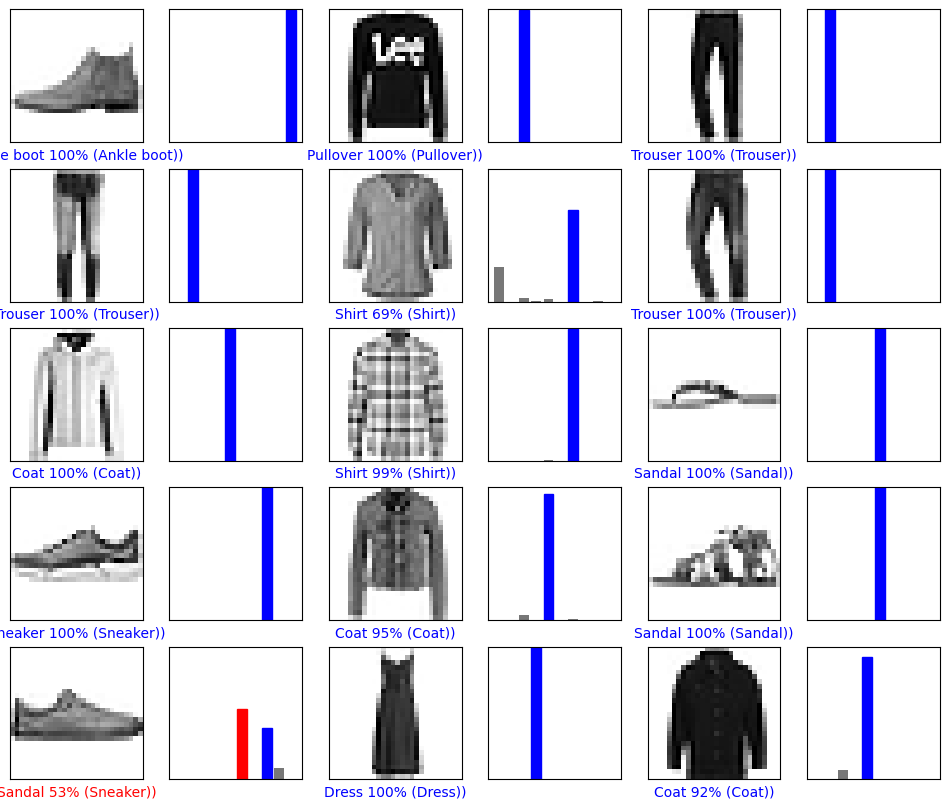

In [34]:

i= 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images) 
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels) 
plt.show()
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images): 
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images) 
    plt.subplot(num_rows,
    2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()